In [1]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Dummy data for ingredients, model ratings (M), and EWG ratings (E)
ingredients = [
    "ingredient1",
    "ingredient2",
    "ingredient3",
    "ingredient4",
    "ingredient5",
]
model_ratings = np.array([8, 6, 9, 5, 7])  # Model ratings
ewg_ratings = np.array([3, 4, 2, 6, 5])  # EWG ratings
alpha = 0.7  # Parameter for combining ratings
p = 2  # Parameter for the power mean


In [2]:
# Step 2: AHP Pairwise Comparison Matrix (example values)
pairwise_comparison_matrix = np.array(
    [
        [1, 2, 3, 4, 5],
        [1 / 2, 1, 2, 3, 4],
        [1 / 3, 1 / 2, 1, 2, 3],
        [1 / 4, 1 / 3, 1 / 2, 1, 2],
        [1 / 5, 1 / 4, 1 / 3, 1 / 2, 1],
    ]
)

In [12]:
# Step 3: Calculate weights using AHP
eigenvalues, eigenvectors = eig(pairwise_comparison_matrix)
max_eigenvalue_index = np.argmax(eigenvalues)
principal_eigenvector = eigenvectors[:, max_eigenvalue_index].real
weights = principal_eigenvector / np.sum(principal_eigenvector)  # Normalize weights
weights

array([0.41853929, 0.26251761, 0.15992286, 0.09725359, 0.06176665])

In [14]:
# Step 4: Combine ratings non-linearly
combined_ratings = (model_ratings**alpha) * (ewg_ratings ** (1 - alpha))
weighted_combined_ratings = combined_ratings**weights
weighted_combined_ratings

array([2.11102436, 1.55028053, 1.32210548, 1.1756757 , 1.12070451])

In [5]:
# Step 5: Aggregate using the weighted power mean
overall_rating = (np.sum(weights * weighted_combined_ratings**p)) ** (1 / p)

# Print Overall Product Rating
print(f"Overall Product Rating: {overall_rating:.2f}")

Overall Product Rating: 1.73


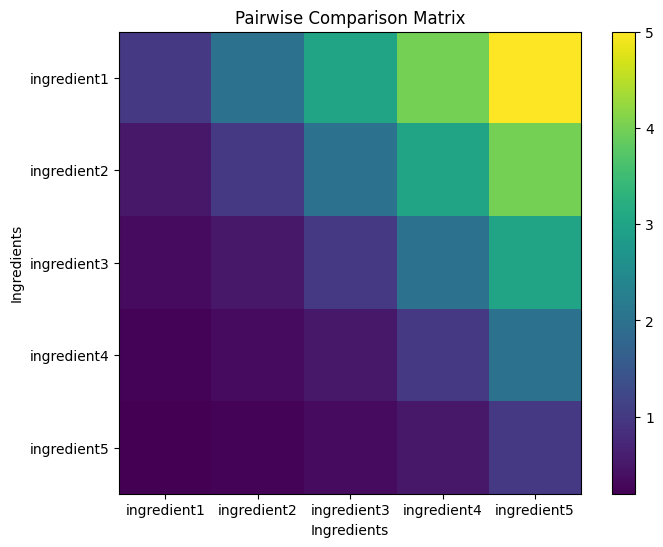

In [6]:
# Plot 1: Pairwise Comparison Matrix
plt.figure(figsize=(8, 6))
plt.imshow(pairwise_comparison_matrix, cmap="viridis")
plt.colorbar()
plt.title("Pairwise Comparison Matrix")
plt.xlabel("Ingredients")
plt.ylabel("Ingredients")
plt.xticks(ticks=np.arange(len(ingredients)), labels=ingredients)
plt.yticks(ticks=np.arange(len(ingredients)), labels=ingredients)
plt.show()


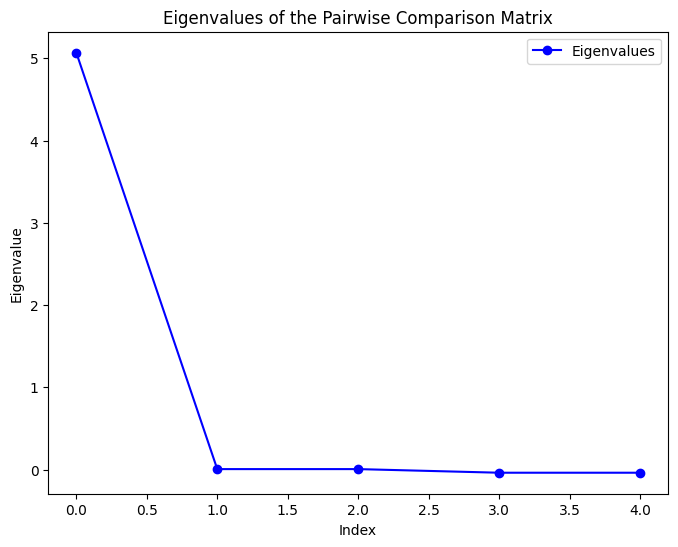

In [7]:
# Plot 2: Eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(eigenvalues.real, "bo-", label="Eigenvalues")
plt.title("Eigenvalues of the Pairwise Comparison Matrix")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.legend()
plt.show()


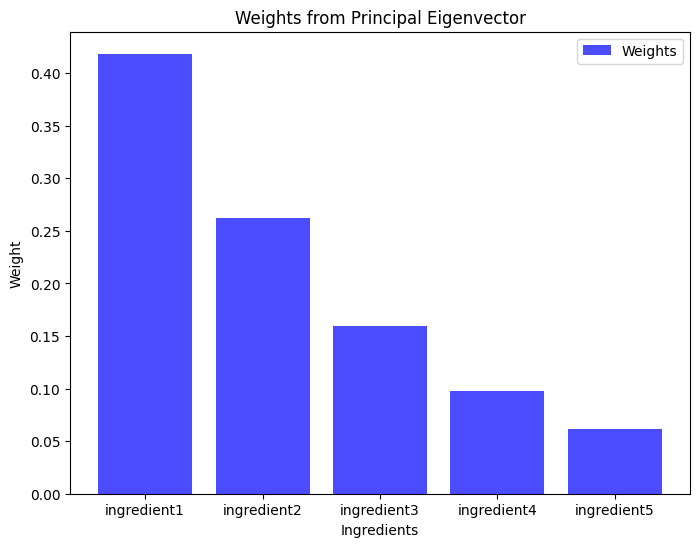

In [8]:
# Plot 3: Principal Eigenvector (Weights)
plt.figure(figsize=(8, 6))
plt.bar(ingredients, weights, color="blue", alpha=0.7, label="Weights")
plt.xlabel("Ingredients")
plt.ylabel("Weight")
plt.title("Weights from Principal Eigenvector")
plt.legend()
plt.show()


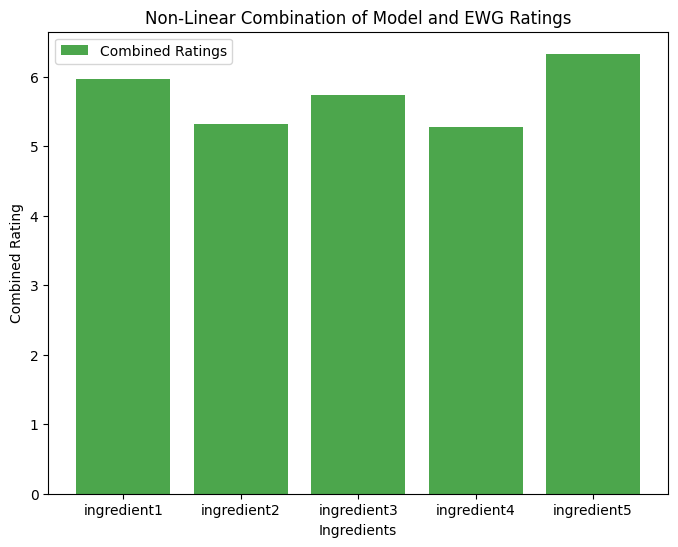

In [9]:
# Plot 4: Combined Ratings
plt.figure(figsize=(8, 6))
plt.bar(
    ingredients, combined_ratings, color="green", alpha=0.7, label="Combined Ratings"
)
plt.xlabel("Ingredients")
plt.ylabel("Combined Rating")
plt.title("Non-Linear Combination of Model and EWG Ratings")
plt.legend()
plt.show()


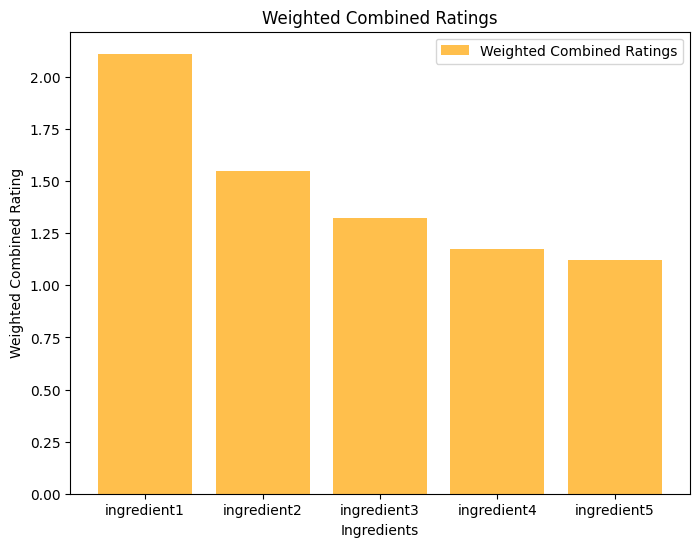

In [10]:
# Plot 5: Weighted Combined Ratings
plt.figure(figsize=(8, 6))
plt.bar(
    ingredients,
    weighted_combined_ratings,
    color="orange",
    alpha=0.7,
    label="Weighted Combined Ratings",
)
plt.xlabel("Ingredients")
plt.ylabel("Weighted Combined Rating")
plt.title("Weighted Combined Ratings")
plt.legend()
plt.show()


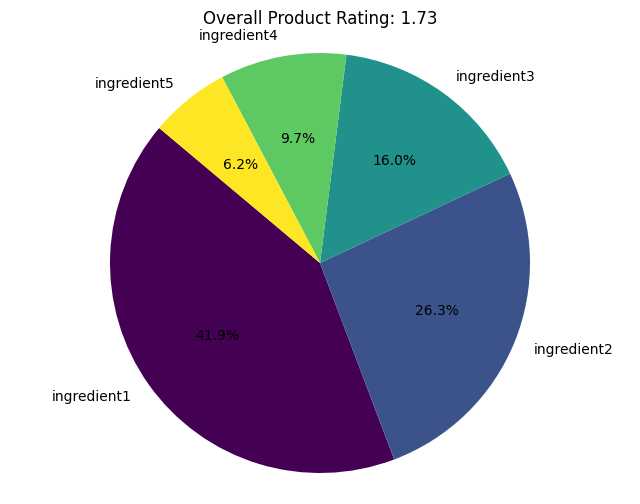

In [11]:
# Plot 6: Overall Product Rating in Pie Chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    weights,
    labels=ingredients,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.viridis(np.linspace(0, 1, len(weights))),
)
ax.axis("equal")
plt.title(f"Overall Product Rating: {overall_rating:.2f}")
plt.show()